# Création de CNN à partir des recherches de CAO et CHOE

## Importation des modules

In [15]:
!pip install -r requirements.txt

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'C:\\Users\\Utilisateur\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
from torchvision import datasets, transforms
from torchsummary import summary 
from torchvision import models

In [4]:
#importation des fichiers pour utiliser les fonctions
from Medium_CNN import MediumCNN, MediumFit,ConvNet,NewCNN, ConvNet_mod, plot_accuracy,plot_loss
from DC_CNN import CNNet, fit_CNN, val_CNN

## Importation des images

In [5]:

train = datasets.ImageFolder("./train_another",transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

#Validation
validation = datasets.ImageFolder("./validation_another",transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

In [6]:
#Chargement en DataLoader avec batch 128 pour éviter les crashs en entrainement et shuffle
#pour mélanger les batchs à chaque étape de l'entrainement
train_dl = torch.utils.data.DataLoader(train, 20, shuffle = True, num_workers = 0, pin_memory = True)

val_dl = torch.utils.data.DataLoader(validation, 20, shuffle = True,num_workers = 0, pin_memory = True)

In [7]:


train_damage_dir = './train_another/damage'
validation_damage_dir = './validation_another/damage'
test_damage_dir = './test_another/damage'

train_nodamage_dir = './train_another/no_damage'
validation_nodamage_dir = './validation_another/no_damage'
test_nodamage_dir = './test_another/no_damage'



In [8]:
print('total training damage images: ',len(os.listdir(train_damage_dir)))
print('total validation damage images: ',len(os.listdir(validation_damage_dir)))
print('total test damage images: ',len(os.listdir(test_damage_dir)))

print('total training no damage images: ',len(os.listdir(train_nodamage_dir)))
print('total validation no damage images: ',len(os.listdir(validation_nodamage_dir)))
print('total test no damage images: ',len(os.listdir(test_nodamage_dir)))

total training damage images:  5000
total validation damage images:  1000
total test damage images:  8000
total training no damage images:  5000
total validation no damage images:  1000
total test no damage images:  1000


## Reproduction du 1er modèle et du meilleure modèle obtenue

### Reproduction du premier modèle 

In [7]:
#definision du premier CNN
model = MediumCNN()
model

MediumCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=6272, out_features=512, bias=True)
    (14): ReLU()
    (15): Linear(in_features=512, out_features=2, bias=True)
    (16): Sigmoid()
  )
)

In [ ]:
#num_epochs = 50
#opt_func = torch.optim.RMSprop
#lr = 1e-4
#fitting the model on training data and record the result after each epoch
#history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
#reproduire le 1er modele 
#data augmentation + RMSprop optimizer 
num_epochs = 50
opt_func = torch.optim.RMSprop
lr = 1e-4
#fitting the model on training data and record the result after each epoch
history = MediumFit(num_epochs, lr, model, train_dl, val_dl, opt_func)

### Reproduction du meilleur modèle 

In [8]:
#creation du modele en rajoutant dropout 
#reproduction du 2eme model
model2 = ConvNet()
model2

ConvNet(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Dropout(p=0.5, inplace=False)
    (14): Linear(in_features=6272, out_features=512, bias=True)
    (15): ReLU()
    (16): Linear(in_features=512, out_features=2, bias=True)
    (17): Sigmoid()
  )
)

In [11]:
#reproduire le meilleur modele
#data augmentation et dropout + Adam optimizer 
num_epochs = 50 #nous aurions pu mettre plus pour un meilleur apprentissage
opt_func = torch.optim.Adam
lr = 1e-4
history2, model2 = MediumFit(num_epochs, lr, model2, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6795, val_loss: 0.6194, val_acc: 0.7420
Epoch [1], train_loss: 0.5881, val_loss: 0.5261, val_acc: 0.7940
Epoch [2], train_loss: 0.5428, val_loss: 0.5441, val_acc: 0.7520
Epoch [3], train_loss: 0.5307, val_loss: 0.5135, val_acc: 0.8010
Epoch [4], train_loss: 0.5078, val_loss: 0.4916, val_acc: 0.8120
Epoch [5], train_loss: 0.4985, val_loss: 0.4643, val_acc: 0.8470
Epoch [6], train_loss: 0.4549, val_loss: 0.4546, val_acc: 0.8570
Epoch [7], train_loss: 0.4654, val_loss: 0.4065, val_acc: 0.9070
Epoch [8], train_loss: 0.4244, val_loss: 0.4425, val_acc: 0.8690
Epoch [9], train_loss: 0.4300, val_loss: 0.4072, val_acc: 0.9100
Epoch [10], train_loss: 0.4220, val_loss: 0.4077, val_acc: 0.9120
Epoch [11], train_loss: 0.4097, val_loss: 0.4220, val_acc: 0.8870
Epoch [12], train_loss: 0.4142, val_loss: 0.4049, val_acc: 0.9060
Epoch [13], train_loss: 0.4108, val_loss: 0.4261, val_acc: 0.8840
Epoch [14], train_loss: 0.4106, val_loss: 0.3969, val_acc: 0.9220
Epoch [15], train_lo

In [17]:
summary(model2)

Layer (type:depth-idx)                   Param #
ConvNet                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       896
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
│    └─Conv2d: 2-4                       18,496
│    └─ReLU: 2-5                         --
│    └─MaxPool2d: 2-6                    --
│    └─Conv2d: 2-7                       73,856
│    └─ReLU: 2-8                         --
│    └─MaxPool2d: 2-9                    --
│    └─Conv2d: 2-10                      147,584
│    └─ReLU: 2-11                        --
│    └─MaxPool2d: 2-12                   --
│    └─Flatten: 2-13                     --
│    └─Dropout: 2-14                     --
│    └─Linear: 2-15                      3,211,776
│    └─ReLU: 2-16                        --
│    └─Linear: 2-17                      1,026
│    └─Sigmoid: 2-18                     --
Total params: 3,453,634
Trainable params: 3,453

In [115]:
#sauvegarde du modele 
torch.save(model2.state_dict(), "model.pt")

# Fine tuning modele

## resnet50 modele pretrained

In [9]:
#importation de resnet50 pretrained
resnet50 = models.resnet50(pretrained=True)

C:\Users\sibghi\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sibghi\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# Freeze the parameters to avoid backpropagation through them
for param in resnet50.parameters():
    param.requires_grad = False

# Create a new sequential model
classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2),
            nn.Sigmoid())

# Replace the last layer of the pre-trained model with our classifier
resnet50.fc = classifier


In [ ]:
summary(resnet50,(3,150,150))

In [14]:
#apprentissage du modele resnet50 + derniere couche changee 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(resnet50.parameters(), lr=1e-4)
model = fit_CNN(resnet50, train_dl, criterion, optimizer)

0 tensor(0.4679, grad_fn=<NllLossBackward0>)
1 tensor(0.4983, grad_fn=<NllLossBackward0>)
2 tensor(0.4722, grad_fn=<NllLossBackward0>)
3 tensor(0.4294, grad_fn=<NllLossBackward0>)
4 tensor(0.4440, grad_fn=<NllLossBackward0>)
5 tensor(0.4526, grad_fn=<NllLossBackward0>)
6 tensor(0.3516, grad_fn=<NllLossBackward0>)
7 tensor(0.5136, grad_fn=<NllLossBackward0>)
8 tensor(0.3968, grad_fn=<NllLossBackward0>)
9 tensor(0.4673, grad_fn=<NllLossBackward0>)
Finished Training


In [17]:
#sauvegarde du modele resnet50 + derniere couche changee
torch.save(model.state_dict(), "resnet50_coucheChange.pt")

## alexnet modele pretrained

In [7]:
#importation de alexnet pretrained
alexnet = models.alexnet(pretrained=True)

C:\Users\Sam\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Sam\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
# Freeze the parameters to avoid backpropagation through them
for param in alexnet.parameters():
    param.requires_grad = False

alexnet.classifier[-1].requires_grad = True

# Create a new sequential model
classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 2),
            nn.Sigmoid())

# Replace the last layer of the pre-trained model with our classifier
alexnet.classifier[-1] = classifier


In [41]:
summary(alexnet,(3,150,150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 36, 36]          23,296
              ReLU-2           [-1, 64, 36, 36]               0
         MaxPool2d-3           [-1, 64, 17, 17]               0
            Conv2d-4          [-1, 192, 17, 17]         307,392
              ReLU-5          [-1, 192, 17, 17]               0
         MaxPool2d-6            [-1, 192, 8, 8]               0
            Conv2d-7            [-1, 384, 8, 8]         663,936
              ReLU-8            [-1, 384, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         884,992
             ReLU-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         590,080
             ReLU-12            [-1, 256, 8, 8]               0
        MaxPool2d-13            [-1, 256, 3, 3]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
#apprentissage du modele alexnet + derniere couche changee 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(alexnet.parameters(), lr=1e-4)
model2 = fit_CNN(alexnet, train_dl, criterion, optimizer)

In [ ]:
#sauvegarde du modele alexnet + derniere couche changee
torch.save(model2.state_dict(), "alexnet_coucheChange.pt")

## wide_resnet50_2 modele pretrained

In [17]:
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'C:\\Users\\Utilisateur/.cache\\torch'

In [18]:
wide_resnet50_2

NameError: name 'wide_resnet50_2' is not defined

In [8]:
for param in wide_resnet50_2.parameters():
    param.requires_grad = False
        
        
wide_resnet50_2.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2),
            nn.Sigmoid())

In [9]:
summary(wide_resnet50_2,(3,150,150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 75, 75]           9,408
       BatchNorm2d-2           [-1, 64, 75, 75]             128
              ReLU-3           [-1, 64, 75, 75]               0
         MaxPool2d-4           [-1, 64, 38, 38]               0
            Conv2d-5          [-1, 128, 38, 38]           8,192
       BatchNorm2d-6          [-1, 128, 38, 38]             256
              ReLU-7          [-1, 128, 38, 38]               0
            Conv2d-8          [-1, 128, 38, 38]         147,456
       BatchNorm2d-9          [-1, 128, 38, 38]             256
             ReLU-10          [-1, 128, 38, 38]               0
           Conv2d-11          [-1, 256, 38, 38]          32,768
      BatchNorm2d-12          [-1, 256, 38, 38]             512
           Conv2d-13          [-1, 256, 38, 38]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wide_resnet50_2.parameters(), lr=1e-4)
model3 = fit_CNN(wide_resnet50_2, train_dl, criterion, optimizer)

0 tensor(0.5151, grad_fn=<NllLossBackward0>)
1 tensor(0.4733, grad_fn=<NllLossBackward0>)
2 tensor(0.5068, grad_fn=<NllLossBackward0>)


In [ ]:
#sauvegarde du modele alexnet + derniere couche changee
torch.save(model3.state_dict(), "wide_resnet50_2_coucheChange.pt")

## Test du modèle sur les données de validation

In [16]:
#Test du model resnet50 sur les donnees de validation 
val_pretrainresnet50 = val_CNN(model,val_dl) #92% accuracy

The testing set accuracy of the network is: 92 %


In [ ]:
#Test du model alexnet sur les donnees de validation 
val_pretrainvgg19 = val_CNN(model2,val_dl) #89% accuracy

# Modification/Création d'un CNN 


In [9]:
Model_mod = ConvNet_mod()

In [10]:
num_epochs = 3
opt_func = torch.optim.Adam
lr = 1e-4
#fitting the model on training data and record the result after each epoch
history_mod = MediumFit(num_epochs, lr, Model_mod, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6823, val_loss: 0.6593, val_acc: 0.7220
Epoch [1], train_loss: 0.6227, val_loss: 0.5566, val_acc: 0.7700
Epoch [2], train_loss: 0.5404, val_loss: 0.4998, val_acc: 0.8120


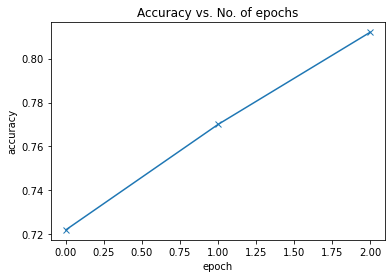

In [11]:
plot_accuracy(history_mod[0])

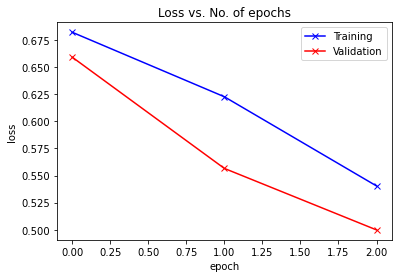

In [12]:
plot_loss(history_mod[0])

In [ ]:
torch.save(history_mod, "Model_mod.pt")

In [3]:
trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((150,150)), transforms.Pad(2)])

#Train
train = datasets.ImageFolder("train_another",transform = trans)

#Validation
validation = datasets.ImageFolder("validation_another",transform = trans)

#train loader
train_loader = torch.utils.data.DataLoader(train, 20, shuffle = True, num_workers = 4, pin_memory = True)

#test loader
val_loader = torch.utils.data.DataLoader(validation, 20, shuffle = False, num_workers = 4, pin_memory = True)

In [4]:
NewModel = NewCNN()

In [10]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 1e-4
#fitting the model on training data and record the result after each epoch
history_perso = MediumFit(num_epochs, lr, NewModel, train_loader, val_loader, opt_func)

Epoch [0], train_loss: 0.3687, val_loss: 0.3627, val_acc: 0.9530
Epoch [1], train_loss: 0.3622, val_loss: 0.3767, val_acc: 0.9350
Epoch [2], train_loss: 0.3589, val_loss: 0.3715, val_acc: 0.9380
Epoch [3], train_loss: 0.3696, val_loss: 0.3384, val_acc: 0.9740
Epoch [4], train_loss: 0.3570, val_loss: 0.3807, val_acc: 0.9250
Epoch [5], train_loss: 0.3636, val_loss: 0.4050, val_acc: 0.9040
Epoch [6], train_loss: 0.3640, val_loss: 0.3276, val_acc: 0.9880
Epoch [7], train_loss: 0.3575, val_loss: 0.3468, val_acc: 0.9660
Epoch [8], train_loss: 0.3551, val_loss: 0.3684, val_acc: 0.9400
Epoch [9], train_loss: 0.3517, val_loss: 0.3454, val_acc: 0.9680
Epoch [10], train_loss: 0.3644, val_loss: 0.3720, val_acc: 0.9420
Epoch [11], train_loss: 0.3575, val_loss: 0.3704, val_acc: 0.9370
Epoch [12], train_loss: 0.3517, val_loss: 0.3311, val_acc: 0.9840
Epoch [13], train_loss: 0.3628, val_loss: 0.3618, val_acc: 0.9530
Epoch [14], train_loss: 0.3629, val_loss: 0.3519, val_acc: 0.9630
Epoch [15], train_lo

In [13]:
torch.save(history_perso, "ModelPerso.pt")

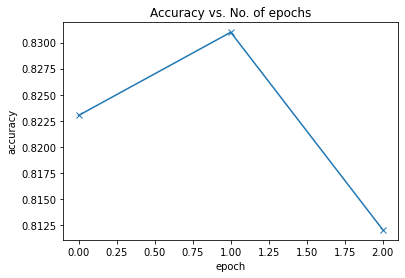

In [20]:
plot_accuracies(history_mod[0])

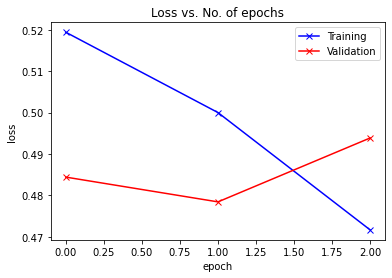

In [21]:
plot_losses(history_mod[0])